Maria Elisa Tovar A01197385

# Evaluación Final - Evaluación del desarrollo de mis competencias

## Introducción

A lo largo de estas 5 semanas aprendimos mucho acerca de la herramienta de Python, dentro de ella se desarrollaron competencias para realizar una limpieza de datos, generar tablas dinamicas, elaborar diferentes tipos de gráficas, realizar modelos de regresion lineal y multiple, etc. Dentro de esta actividad se estaran poniendo en pratica todas aquellas competencias que se desarrollaron en esta unidad de formación, para el desarrollo de esta actividad se estara utilizando el archivo de pokemon.csv.

In [1]:
#Que generación es la más suerte en total?

#Paso 1 - Cargar las librerias necesarias para abrir un documento en excel y comenzar con la limpieza de datos.
import pandas as pd
import numpy as np

#Paso 2 - Abrir archivo de pokemon.csv 
df = pd.read_csv('datasets/pokemon.csv')

df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


Es necesario realizar una limpieza de datos, una limpieza de datos, como lo dice su nombre, es la eliminación de datos erroneos o inncesarios en una base de datos. Es de suma importancia realizar este paso ya que, te permite visualizar los datos incompletos o que tienen poca relevancia para tu análisis. Con el fin de facilmente identificar todas aquellas columnas que van a ser utilizadas para contestar la pregunta principal. Este paso será de gran utilidad para posteriormente identificar las variables criticas que seran utilizadas dentro del proceso.

In [2]:
# Eliminar columnas que no seran utilizadas dentro del análisis 
df.drop(['#','Type 2', 'Legendary', 'Name'],
        axis=1,
        inplace=True)
# Renombrar columnas que seran utilizadas dentro del análisis
df.rename(columns={'Type 1':'Type'},
          inplace=True)
# Cambiar etiquetas de columnas por strings
df.columns = list(map(str, df.columns))



df

,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,Grass,318,45,49,49,65,65,45,1
1,Grass,405,60,62,63,80,80,60,1
2,Grass,525,80,82,83,100,100,80,1
3,Grass,625,80,100,123,122,120,80,1
4,Fire,309,39,52,43,60,50,65,1
...,...,...,...,...,...,...,...,...,...
795,Rock,600,50,100,150,100,150,50,6
796,Rock,700,50,160,110,160,110,110,6
797,Psychic,600,80,110,60,150,130,70,6
798,Psychic,680,80,160,60,170,130,80,6


## Variables Criticas

Las variables criticas que estaran siendo utilizadas dentro de este proceso son aquellas que se ven reflejadas como columnas dentro de la pivot table. Poterirormente se realizara un estudio de variables, en donde se analizara su comportamiento y relación con otras vriables.

## Pregunta
¿Que generación es la más fuerte en total?

Primero que nada, fue necesario realizar una tabla dinamica en donde solamente se presenten las variables necesarias para contestar la pregunta establecida anteriormente.

In [3]:
df_generation = df.groupby('Generation',
                          axis = 0).sum()

print(type(df.groupby('Generation',
                     axis = 0
                     )))
df_generation


<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Generation,,,,,,,
1,70851,10926,12722,11763,11922,11469,12049
2,44338,7548,7635,7779,6990,7834,6552
3,69796,10647,13060,11856,12129,11396,10708
4,55541,8843,10027,9454,9245,9340,8632
5,71773,11845,13541,11934,11878,11342,11233
6,35783,5598,6216,6288,6092,6141,5448


In [4]:
sum(df_generation['Total'])

348082

Las variables criticas que se establecieron fueron:
## Dependientes:

- Total
## Independientes:

- Attack
- HP
- Defense
- Speed

    Se llevo acabo un análisis de correlación para identificar si todas las variables independientes mencionadas anteriormente tenian algun tipo de correlación con el 'Total', la variable 'Total es el equivalente a la fuerza que tiene cada pokemon.
    
    Interpretación del coeficiente de correlación:

- r = 1           --> Correlación perfecta
- 0.81 < r < 0.99 --> Correlación muy alta
- 0.61 < r < 0.80 --> Correlacion alta
- 0.41 < r < 0.60 --> Correlación moderada
- 0.21 < r < 0.40 --> Correlación baja
- 0.0  < r < 0.20 --> Correlación muy baja
- r = 0           --> Correlación nula

    La correlación entre dos variables también se puede identficar por medio de un diagrama de dispersión, dependiendo del comportamiento que muestran los datos a la hora de ser graficados. A continuación, se muestra una imagen con los tipos de comportamiento que se podrían presentar en un diagrama de dispersión en base a su respectiva correlación.

<img src="https://www.maximaformacion.es/wp-content/uploads/2021/07/Que-es-la-correlacion_valores-del-coeficiente.png" height=400 align="center">

Referencia: Merayo, R. (2020). ¿QUÉ ES LA CORRELACIÓN ESTADÍSTICA Y CÓMO INTERPRETARLA?. Recuperado el 7 de septiembre de 2021, de: https://www.maximaformacion.es/blog-dat/que-es-la-correlacion-estadistica-y-como-interpretarla/



In [5]:
Total = df['Total']
Attack = df['Attack']
HP = df['HP']
Defense = df['Defense']
Speed = df['Speed']

correlación_Total_a = Total.corr(Attack)
print(correlación_Total_a)

correlación_Total_h = Total.corr(HP)
print(correlación_Total_h)

correlación_Total_d = Total.corr(Defense)
print(correlación_Total_d)

correlación_Total_s = Total.corr(Speed)
print(correlación_Total_s)

0.7362106519949293
0.6187483543135462
0.6127874293532546
0.5759426553220428


<Figure size 432x288 with 0 Axes>

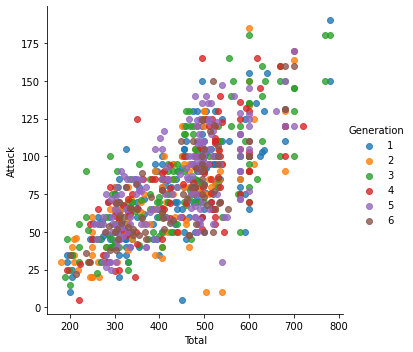

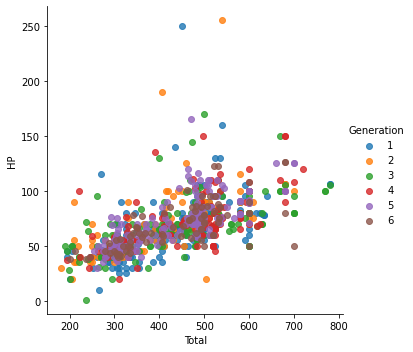

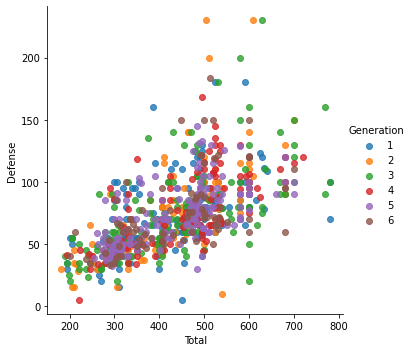

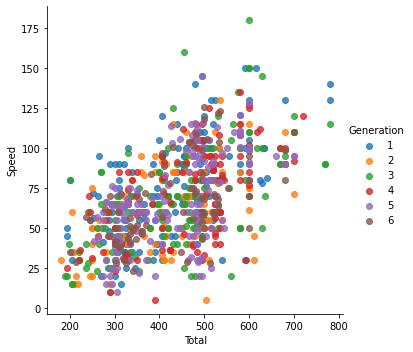

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure()

#ax1 = fig.add_subplot(1,2,1) # 1 renglon, 2 columns y pos 1
sns.lmplot(x = 'Total',
           y = 'Attack',
           data = df,
           fit_reg = False,
          hue = 'Generation')
plt.show()


#ax2 = fig.add_subplot(1,2,2) # 1 renglon, 2 columns y pos 1
sns.lmplot(x = 'Total',
           y = 'HP',
           data = df,
           fit_reg = False,
          hue = 'Generation')

#ax3 = fig.add_subplot(2,2,1) # 2 renglon, 2 columns y pos 1
sns.lmplot(x = 'Total',
           y = 'Defense',
           data = df,
           fit_reg = False,
          hue = 'Generation')

#ax4 = fig.add_subplot(2,2,2) # 2 renglon, 2 columns y pos 2
sns.lmplot(x = 'Total',
           y = 'Speed',
           data = df,
           fit_reg = False,
          hue = 'Generation')

plt.show()

#ax1.title.set_text("Total vs HP")
#ax2.title.set_text("Total vs Attack")
#ax2.title.set_text("Total vs Defense")
#ax2.title.set_text("Total vs Speed")



### Interpretación
En base a la información mencioanda anteriormente y tomando en cuenta los coeficientes de correlación entre la variable dependiente contra las variables independientes se podría decir que todas cuentan con al menos, una correlación alta. (- 0.61 < r < 0.80 --> Correlacion alta)


Los diagramas de dispersión pueden confirmar dicha correlación en base al comportamiento que se muestra en cada grafica. Las graficaas muestran un comportamiento positivo con una correlación alta entre las variables.

## Modelo de Regresión Lineal Simple
### El metodo de Regresión lineal simple se utiliza para predecir una variable cuantitativa 'Y', con base en una sola variable predictora 'X'.

Modelo matematico:
- Y ≈ β0 + β1X

    Coeficientes del modelo
- β0 - Intercepto
- β1 - Pendiente

En este caso se estara analizando el 'Total' como variable dependiente y el 'Attack' como variable independiente.

In [15]:
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import scipy.stats as stats

model = sm.OLS.from_formula('Total~Attack',  #Total = b0 + b1*Attack
                           data = df_generation)
result1 = model.fit()
result1.summary()

/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Total   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     671.8
Date:                Wed, 08 Sep 2021   Prob (F-statistic):           1.32e-05
Time:                        15:48:36   Log-Likelihood:                -50.417
No. Observations:                   6   AIC:                             104.8
Df Residuals:                       4   BIC:                             104.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5671.1988   2090.302      2.713      0.053    -132.410    1.15e+04
Attack         4.9691      0.192     25.919      0.000       4.437       5.501
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.876
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.668
Skew:                           0.709   Prob(JB):                        0.716
Kurtosis:                       2.189   Cond. No.                     4.22e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

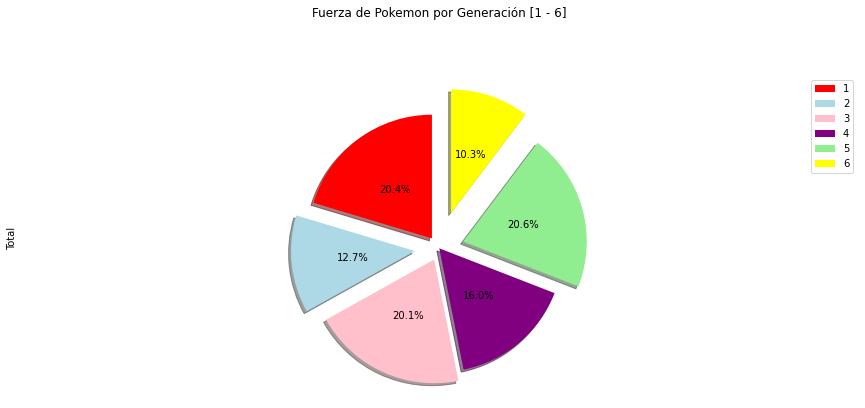

In [8]:
import matplotlib.pyplot as plt
colors_list = ['red', 'lightblue', 'pink', 'purple', 'lightgreen', 'yellow']
explode_list = [0.1, 0.2, 0.1, 0, 0.2, 0.3] # ratio for each continent with which to offset each wedge.

# autopct create %, start angle represent starting point
df_generation['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance= 0.5,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Fuerza de Pokemon por Generación [1 - 6]', y=1.16) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_generation.index, loc='upper right') 

plt.show()

In [9]:
df_generation.columns

Index(['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'], dtype='object')

In [10]:
import statsmodels.api as sm
model = sm.OLS.from_formula('Total~HP + Attack + Defense + Speed',  #Total = b0 + b1*HP + b2*Attack + b3*Defense + b4*Speed
                           data = df_generation)
result1 = model.fit()
result1.summary()

/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Total   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.305e+04
Date:                Wed, 08 Sep 2021   Prob (F-statistic):            0.00413
Time:                        15:47:12   Log-Likelihood:                -30.429
No. Observations:                   6   AIC:                             70.86
Df Residuals:                       1   BIC:                             69.82
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -263.5917    444.928     -0.592      0.660   -5916.936    5389.753
HP             0.4649      0.111      4.202      0.149      -0.941       1.871
Attack         1.1277      0.182      6.181      0.102      -1.191       3.446
Defense        3.1759      0.262     12.107      0.052      -0.157       6.509
Speed          1.1903      0.087     13.745      0.046       0.090       2.291
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.316
Prob(Omnibus):                    nan   Jarque-Bera (JB):                3.394
Skew:                           1.753   Prob(JB):                        0.183
Kurtosis:                       4.135   Cond. No.                     2.30e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
ft = result1.fittedvalues
ft

Generation
1    70863.248416
2    44360.056032
3    69813.845444
4    55455.133837
5    71785.848604
6    35803.867667
dtype: float64

In [12]:
result1.resid

Generation
1   -12.248416
2   -22.056032
3   -17.845444
4    85.866163
5   -12.848604
6   -20.867667
dtype: float64

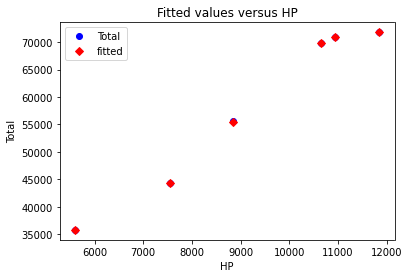

In [13]:
sm.graphics.plot_fit(result1,1, vlines=False);